In [1]:
import pandas as pd
import numpy as np
import csv
from scipy.stats import rankdata
from matplotlib import pyplot as plt

In [2]:
seed_list = range(20)
m_imputations = 10
s = 50
t= 250
test_size=0.5
dataset_list = ['avila', 'biodeg', 'landcover',  'letter', 'magic',  'optdigits', 'page-blocks',  'penbased', 'ring', 'satimage', 'segment', 'spambase', 'steel', 'texture', 'twonorm', 'vehicle', 'vowel', 'waveform', 'winequality-red', 'winequality-white']
missing_rate_list = [10,20,30,40,50]
classifier_list = ['rf','nn','lr']
method_list = ['random', 'lc', 'lm', 'entropy', 'gini', 'cumir', 'proposed_lm']

In [3]:
for dataset in dataset_list:
    for missing_rate in missing_rate_list:
        for classifier in classifier_list:
            for method in method_list:      
                    array = np.empty((0,1))
                    for seed in seed_list:
                        a = pd.read_csv('./result/{0}_{1}_{2}_{3}_{4}.csv'.format(method ,dataset, missing_rate, classifier, seed), delimiter=',', header=None)
                        a_array = np.array(a)
                        array = np.concatenate((array.reshape(t+1,-1), a_array), axis=1)
                    avg_array = np.mean(array, axis=1)
                        
                    b = open('./result/avg/{0}_{1}_{2}_{3}.csv'.format(method, dataset, missing_rate, classifier), 'w', newline='')
                    wrb = csv.writer(b)
                    for i in avg_array:
                        wrb.writerow([i])
                    b.close()

In [4]:
for missing_rate in missing_rate_list:
    for classifier in classifier_list:
        for method in method_list:
            array = np.empty((0,1))
            for dataset in dataset_list:
                a = pd.read_csv('./result/avg/{0}_{1}_{2}_{3}.csv'.format(method, dataset, missing_rate, classifier), delimiter=',', header=None)
                a_array = np.array(a)
                start_point = a_array[0]
                a_array -= start_point
                array = np.concatenate((array.reshape(t+1,-1), a_array), axis=1)
            avg_array = np.mean(array, axis=1)
                    
            b = open('./result/avg/mai/{0}_{1}_{2}.csv'.format(method,missing_rate,classifier), 'w', newline='')
            wrb = csv.writer(b)
            for i in avg_array:
                wrb.writerow([i])
            b.close()
           

In [5]:
iteration = 250
for classifier in classifier_list:
    b = open('./result/avg_rank/avg/iter{0}_{1}.csv'.format(iteration, classifier),'w',newline='')
    c = open('./result/avg_rank/std/iter{0}_{1}.csv'.format(iteration, classifier), 'w', newline='')
    for missing_rate in missing_rate_list:
        rank_matrix = np.zeros((20,7))
        
        for dataset_idx, dataset in enumerate(dataset_list):
            
            proposed_lm = pd.read_csv('./result/avg/proposed_lm_{0}_{1}_{2}.csv'.format(dataset, missing_rate, classifier), delimiter=',',header=None)
            proposed_lm = np.array(proposed_lm)[iteration]
            lc = pd.read_csv('./result/avg/lc_{0}_{1}_{2}.csv'.format(dataset, missing_rate, classifier), delimiter=',',header=None)
            lc = np.array(lc)[iteration]
            lm = pd.read_csv('./result/avg/lm_{0}_{1}_{2}.csv'.format(dataset, missing_rate, classifier), delimiter=',',header=None)
            lm = np.array(lm)[iteration]
            entropy = pd.read_csv('./result/avg/entropy_{0}_{1}_{2}.csv'.format(dataset, missing_rate, classifier), delimiter=',',header=None)
            entropy = np.array(entropy)[iteration]
            gini = pd.read_csv('./result/avg/gini_{0}_{1}_{2}.csv'.format(dataset, missing_rate, classifier), delimiter=',',header=None)
            gini = np.array(gini)[iteration]
            cumir = pd.read_csv('./result/avg/cumir_{0}_{1}_{2}.csv'.format(dataset, missing_rate, classifier), delimiter=',',header=None)
            cumir = np.array(cumir)[iteration]
            random = pd.read_csv('./result/avg/random_{0}_{1}_{2}.csv'.format(dataset, missing_rate, classifier), delimiter=',',header=None)
            random = np.array(random)[iteration]

            comparison_matrix = np.concatenate((random, lc, lm, entropy, gini,cumir, proposed_lm), axis=0)
            comparison_matrix = -comparison_matrix
            
            comparison_rank = rankdata(comparison_matrix)
            rank_matrix[dataset_idx] = comparison_rank
        
        average_rank_matrix = np.mean(rank_matrix, axis=0)
        average_rank_matrix = np.round(average_rank_matrix,2)
        
        std_rank_matrix = np.std(rank_matrix, axis=0)
        std_rank_matrix = np.round(std_rank_matrix,2)
        #print('iter:',iteration, 'clf:', classifier,'missing:', missing_rate)
        
        wrb = csv.writer(b)
        wrb.writerow(average_rank_matrix)
        wrc = csv.writer(c)
        wrc.writerow(std_rank_matrix)
    b.close()
    c.close()

In [6]:
for classifier in classifier_list:
    avg = pd.read_csv('./result/avg_rank/avg/iter{0}_{1}.csv'.format(iteration, classifier), delimiter=',', header=None).values
    std = pd.read_csv('./result/avg_rank/std/iter{0}_{1}.csv'.format(iteration, classifier), delimiter=',', header=None).values
    
    d = open('./result/avg_rank/total/iter{0}_{1}.csv'.format(iteration, classifier), 'w', newline='')
    for i in range(avg.shape[0]):
        
        aList=[]
        for j in range(avg.shape[1]):
            avg_val = avg[i,j]
            std_val = std[i,j]
            total_str = '%.2f±%.2f'%(avg_val, std_val)
            aList.append(total_str)
        print(aList)
        wrd = csv.writer(d)
        wrd.writerow(aList)
    d.close()

['6.65±0.91', '3.52±1.13', '2.68±1.45', '4.92±1.69', '4.42±1.06', '3.45±1.69', '2.35±1.62']
['6.70±0.90', '3.68±0.71', '2.68±1.25', '4.97±1.50', '4.45±1.37', '3.58±1.76', '1.95±1.40']
['6.55±0.97', '3.35±0.94', '2.55±1.48', '4.90±1.53', '4.50±1.30', '4.05±1.60', '2.10±1.48']
['5.90±1.67', '3.92±1.03', '2.85±1.07', '5.08±1.60', '4.18±1.33', '4.32±1.87', '1.75±1.61']
['6.15±1.42', '3.68±1.61', '2.85±1.00', '5.12±1.26', '4.12±1.32', '4.62±1.54', '1.45±1.07']
['6.75±0.77', '3.50±1.47', '3.32±1.48', '3.88±1.63', '3.90±1.79', '3.70±1.68', '2.95±1.99']
['6.60±1.11', '3.50±1.36', '4.15±1.46', '3.55±1.53', '3.90±1.51', '3.75±1.95', '2.55±1.96']
['6.75±0.89', '3.65±1.31', '4.10±1.48', '4.00±1.41', '3.40±1.59', '3.75±1.87', '2.35±1.82']
['6.00±1.90', '4.00±1.34', '4.10±1.70', '3.45±1.40', '3.98±1.25', '4.60±1.98', '1.88±1.40']
['6.45±1.36', '3.85±1.04', '3.95±1.34', '3.60±1.45', '3.80±1.31', '5.05±1.72', '1.30±0.90']
['6.10±1.45', '3.62±1.11', '3.12±1.18', '4.88±1.91', '4.08±1.85', '3.95±1.47', '

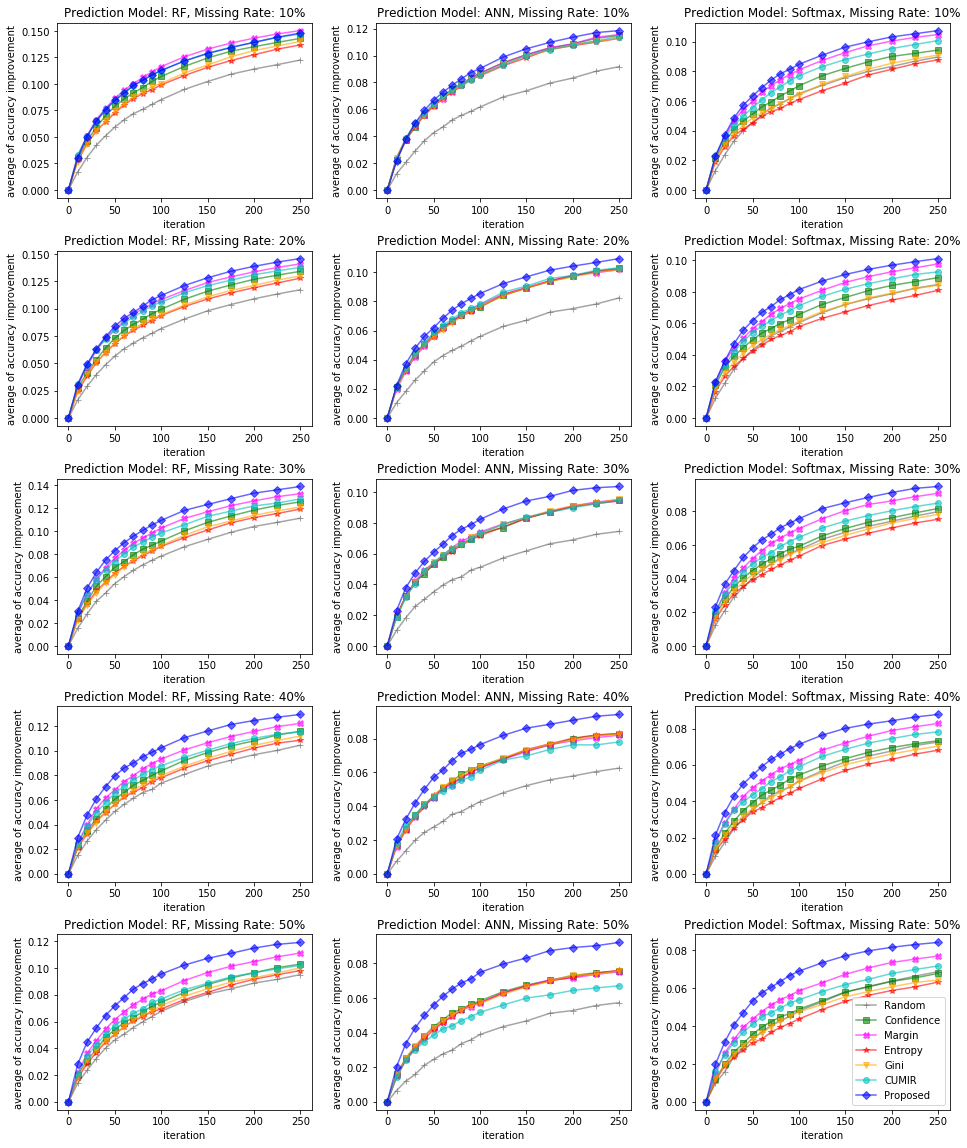

In [7]:
#x1 = np.arange(0,21, 2)
#x2 = np.arange(25, t+1, 5)
#x = np.concatenate((x1,x2))
x1 = np.arange(0,101, 10)
x2 = np.arange(125, t+1, 25)
x = np.concatenate((x1,x2))
#x = np.arange(0,251,10)
fig = plt.figure()
fig.set_size_inches((16, 20))
fig.subplots_adjust(wspace=0.25, hspace=0.3)
j=1
    
for mrate_idx, missing_rate in enumerate(missing_rate_list):   
    for clf_idx, classifier in enumerate(classifier_list): 
        for method in method_list:
            if method == 'proposed_lm':
                proposed_lm = pd.read_csv('./result/avg/mai/proposed_lm_{0}_{1}.csv'.format(missing_rate, classifier), delimiter=',', header=None)
                proposed_lm_arr = np.array(proposed_lm)[x]
                
                         
            elif method == 'cumir':
                cumir = pd.read_csv('./result/avg/mai/cumir_{0}_{1}.csv'.format(missing_rate, classifier), delimiter=',', header=None)
                cumir_arr = np.array(cumir)[x]
                
            elif method == 'entropy':
                entropy = pd.read_csv('./result/avg/mai/entropy_{0}_{1}.csv'.format(missing_rate, classifier), delimiter=',', header=None)
                entropy_arr = np.array(entropy)[x]
            
            elif method == 'gini':
                gini = pd.read_csv('./result/avg/mai/gini_{0}_{1}.csv'.format(missing_rate, classifier), delimiter=',', header=None)
                gini_arr = np.array(gini)[x]
            
            elif method == 'lc':
                lc = pd.read_csv('./result/avg/mai/lc_{0}_{1}.csv'.format(missing_rate, classifier), delimiter=',', header=None)
                lc_arr = np.array(lc)[x]
                
            elif method == 'lm':
                lm = pd.read_csv('./result/avg/mai/lm_{0}_{1}.csv'.format(missing_rate, classifier), delimiter=',', header=None)
                lm_arr = np.array(lm)[x]    
            
            
            elif method == 'random':
                random = pd.read_csv('./result/avg/mai/random_{0}_{1}.csv'.format(missing_rate, classifier), delimiter=',', header=None)
                random_arr = np.array(random)[x]
            
        ax = fig.add_subplot(5,3,j)    
        ax.plot(x, random_arr ,marker = '+', color = 'dimgray', alpha=0.6, label='Random')
        ax.plot(x, lc_arr ,marker = 's', color = 'green', alpha=0.6,label='Confidence')
        ax.plot(x, lm_arr ,marker = 'X', color = 'magenta', alpha=0.6,label='Margin')
        ax.plot(x, entropy_arr ,marker = '*', color = 'red', alpha=0.6,label='Entropy')
        ax.plot(x, gini_arr ,marker = 'v', color = 'orange', alpha=0.6,label='Gini')
        ax.plot(x, cumir_arr, marker= 'o', color = 'c', alpha=0.6,label ='CUMIR')
        ax.plot(x, proposed_lm_arr, marker = 'D', color = 'b', alpha=0.6,label='Proposed')
        
        if classifier=='rf':    
            ax.set_title('Prediction Model: RF, Missing Rate: {0}%'.format(missing_rate))
            
        elif classifier=='nn':
            ax.set_title('Prediction Model: ANN, Missing Rate: {0}%'.format(missing_rate))
            
        elif classifier=='lr':
            ax.set_title('Prediction Model: Softmax, Missing Rate: {0}%'.format(missing_rate))
        ax.set_xlabel('iteration')
        ax.set_ylabel('average of accuracy improvement')
            
        if classifier=='lr' and missing_rate==50:
            ax.legend()
            
        j+=1
        